# Practical Lab 4 - Polynomial Regression, and Evaluation using R-Squared, MAPE and MAE.

# Predict the Risk of Diabetes Progression

"We're using a person's Body Mass Index (BMI) to predict how their diabetes will develop. We'll accomplish this by using special mathematical models called polynomial regression model.

However, we can't just assume our models are perfect. So, we're going to check how well they're doing using three measures: R-squared, Mean Absolute Percentage Error (MAPE), and Mean Absolute Error (MAE). These tools will assure if our predictions are accurate or if we need to make adjustments."

## Step 1: Data Loading and Preparation

First, we need to collect our tools and data. We'll load the libraries that will aid us with our analysis. After that, we'll include the diabetes dataset. But here's the catch: we'll just use the BMI feature for our analysis. It's like focussing our microscope on a single feature of the data.

In [1]:
# Imported libraries and modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn import datasets
from sklearn.model_selection import train_test_split
import seaborn as sns

diabetes = datasets.load_diabetes()
X = diabetes.data[:, np.newaxis, 2]
y = diabetes.target

## STEP 2. SPLIT DATA 

Next, we'll separate our data into three categories: training, validation, and test sets. Why are we doing this?
It's like a dress rehearsal for our models. They learn from the training set, fine-tune their performance on the validation set, and then deliver their best performance on the test set, which contains previously unseen data! This allows us to assess how effectively our algorithms can forecast diabetes progression using new data.

In [2]:
# Set the proportion of data to be used for testing
test_ratio = 0.15

# Spliting the data into training+validation set and testing set
# The test_size parameter determines the proportion of the original data is used for the test set.
# random_state parameter is used for initializing the internal random number generator, which will decide the splitting of data into train and test indices.
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=test_ratio, random_state=0)

# Printing the sizes of the training+validation set and testing set
print("Training+Validation set has", X_train_val.shape[0], "samples")
print("Testing set has", X_test.shape[0], "samples")

# Set the proportion of training+validation data to be used for validation
validation_ratio = 0.1765

# Split the training+validation set into training set and validation set
# The test_size parameter determines the proportion of the training+validation data is used for the validation set.
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=validation_ratio, random_state=0)

# Print the sizes of the training set and validation set
print("Training set has", X_train.shape[0], "samples")
print("Validation set has", X_val.shape[0], "samples")

Training+Validation set has 375 samples
Testing set has 67 samples
Training set has 308 samples
Validation set has 67 samples


## Step 3: Model Training and Evaluation

We’re going to train our polynomial regression models, from degree 0 to 5, using the training data. Then, we’ll test these models on the validation data.

After this We’ll store all the results in a DataFrame. It’s like a leaderboard for our models, making it super easy to compare their performances

   Degree  Train R2    Val R2  Train MAE    Val MAE  Train MAPE   Val MAPE   
0     0.0  0.000000 -0.030825  66.334879  71.679638   62.196817  79.672854  \
1     1.0  0.374855  0.321291  50.708293  56.824170   46.493512  60.289797   
2     2.0  0.374881  0.320653  50.707519  56.852641   46.504275  60.291600   
3     3.0  0.382830  0.295960  49.764597  57.694034   45.633928  60.280509   
4     4.0  0.383330  0.299180  49.780927  57.451857   45.566514  60.050506   
5     5.0  0.383614  0.302827  49.782732  57.256981   45.568188  59.798157   

     Train MSE      Val MSE  
0  6011.354476  6674.396493  
1  3757.965493  4394.510718  
2  3757.813383  4398.642892  
3  3710.027888  4558.525387  
4  3707.022454  4537.676893  
5  3705.311755  4514.068081  
         Degree  Train R2    Val R2  Train MAE    Val MAE  Train MAPE   
count  6.000000  6.000000  6.000000   6.000000   6.000000    6.000000  \
mean   2.500000  0.316585  0.251515  52.846491  59.626554   48.660539   
std    1.870829  0.15514

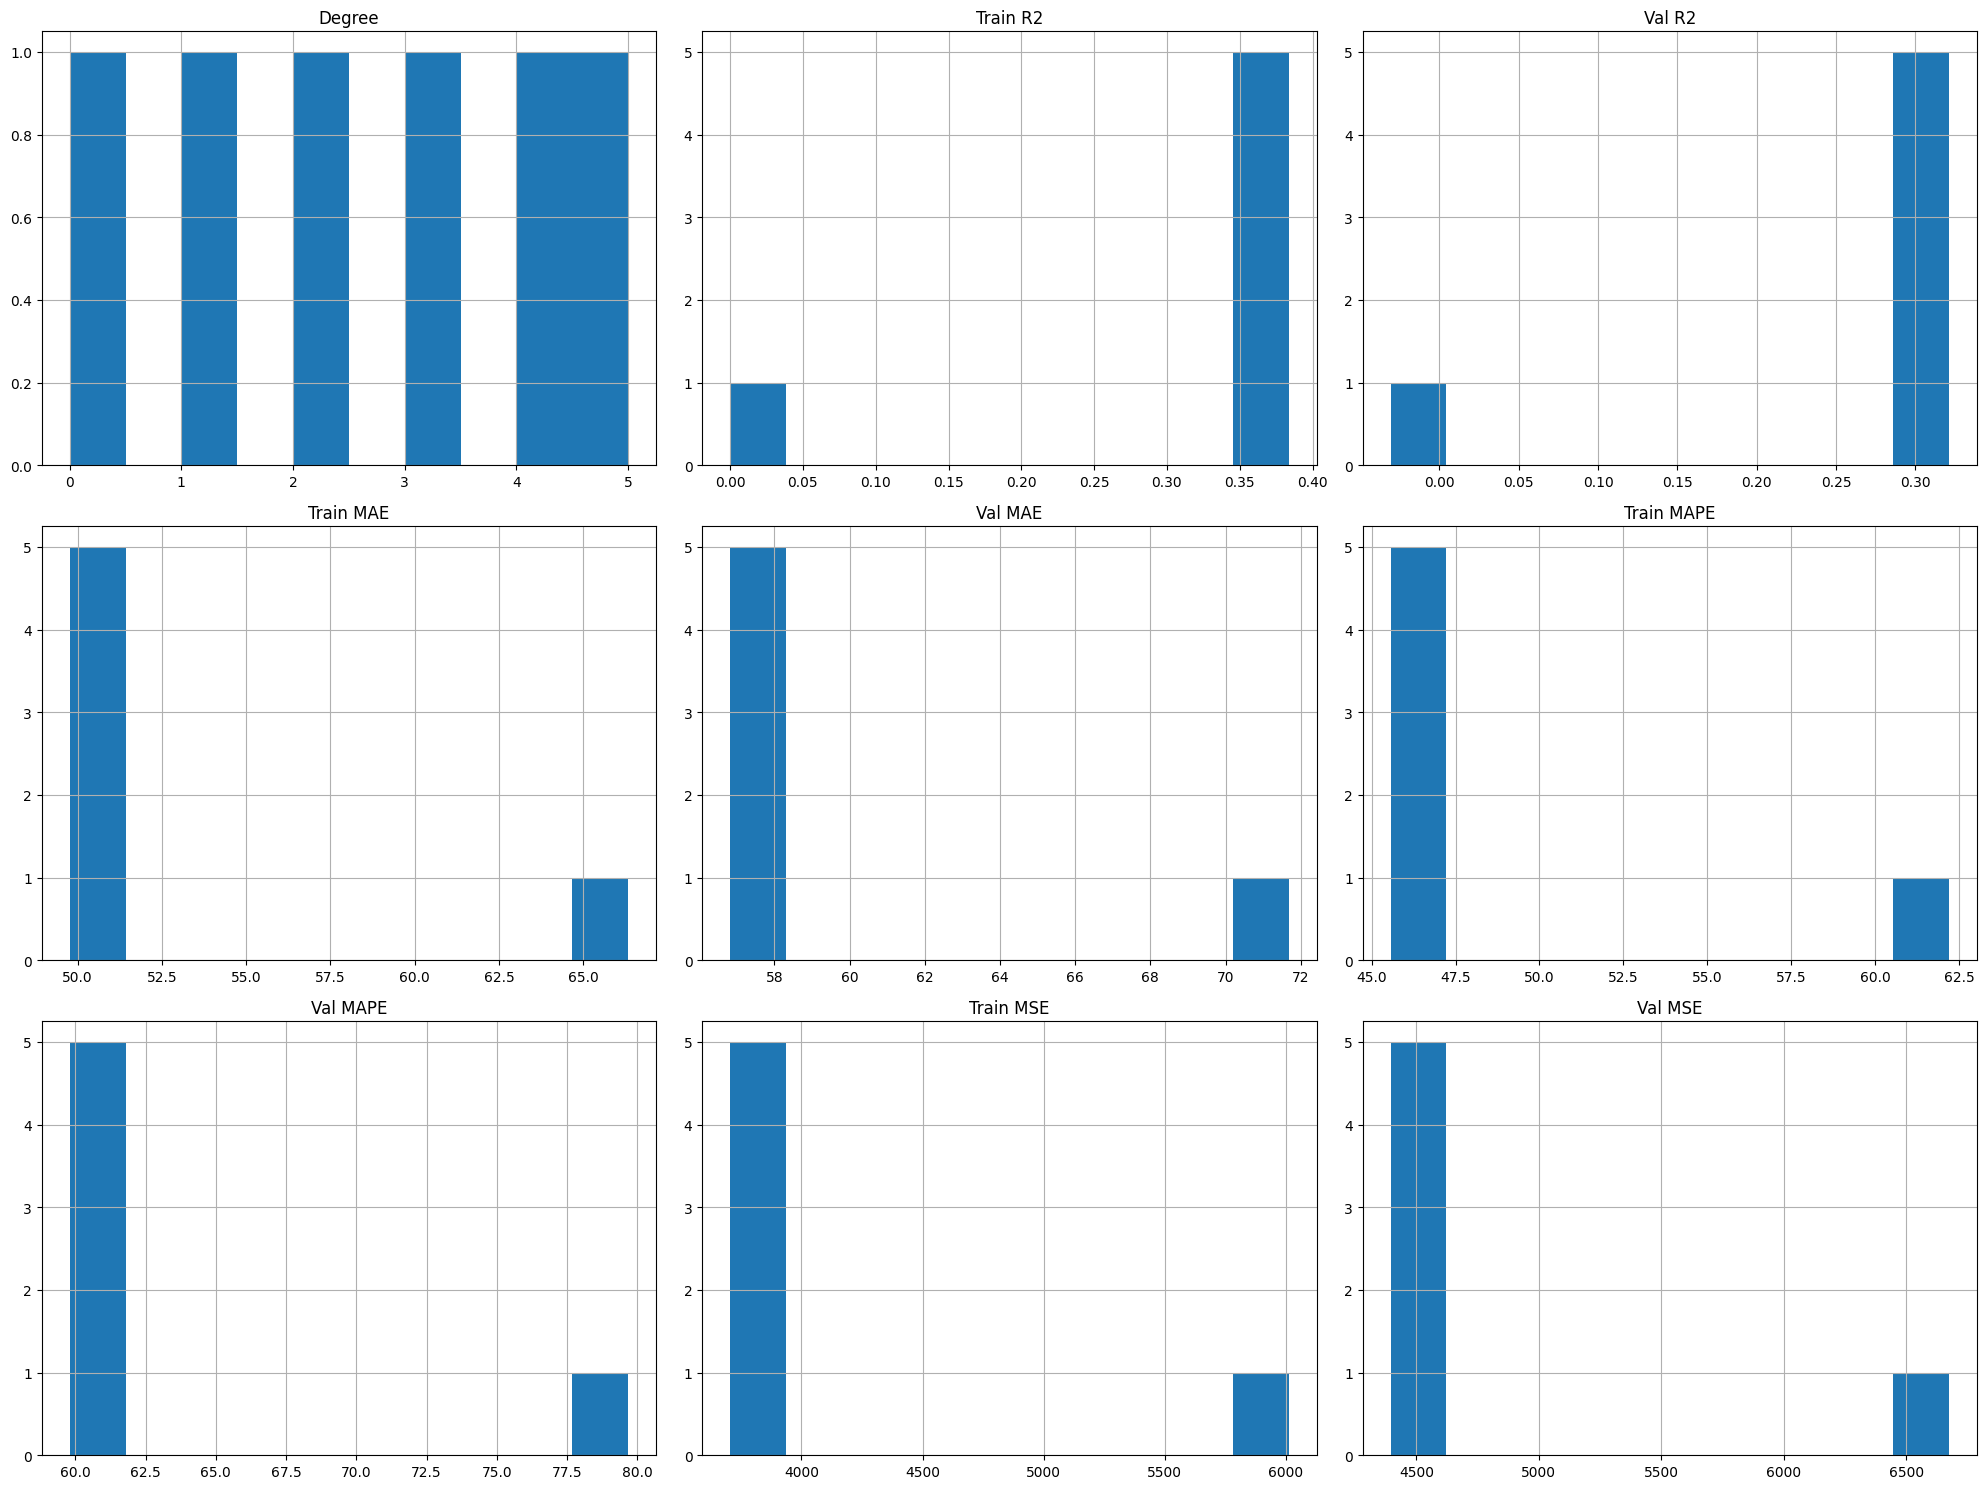

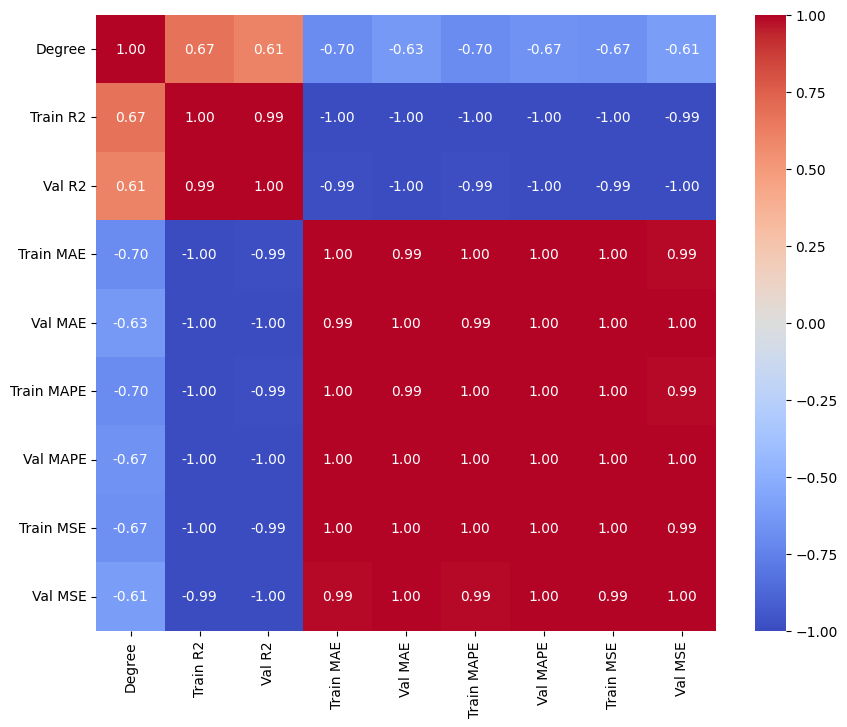

In [3]:
# Define a function to calculate Mean Absolute Percentage Error (MAPE)
def mean_absolute_percentage_error(y_true, y_pred): 
    # The error is the absolute difference between the true and predicted values
    # We divide this by the true values to get the percentage error
    # Then we take the mean of these percentage errors over all data points
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Creating a DataFrame to store the results for each degree of the polynomial
# We will store the R2 score, Mean Absolute Error (MAE), and MAPE for both the training and validation data
results = pd.DataFrame(columns=['Degree', 'Train R2', 'Val R2', 'Train MAE', 'Val MAE', 'Train MAPE', 'Val MAPE', 'Train MSE', 'Val MSE'])

# Looping over degrees from 0 to 5
for degree in range(6):
    # Created a PolynomialFeatures object for transforming the input data
    poly = PolynomialFeatures(degree=degree)

    # Transforming the training and validation data
    X_train_poly = poly.fit_transform(X_train)
    X_val_poly = poly.transform(X_val)
    
    # Created a LinearRegression model
    model = LinearRegression()

    # Trained the model using the transformed training data
    model.fit(X_train_poly, y_train)
    
    # Using the trained model to predict the training and validation data
    y_train_pred = model.predict(X_train_poly)
    y_val_pred = model.predict(X_val_poly)
    
    # Calculated the R2 score for the training and validation data
    train_r2 = r2_score(y_train, y_train_pred)
    val_r2 = r2_score(y_val, y_val_pred)
    
    # Calculated the MAE for the training and validation data
    train_mae = mean_absolute_error(y_train, y_train_pred)
    val_mae = mean_absolute_error(y_val, y_val_pred)
        # Calculated the Mean Squared Error (MSE) for the training and validation data
    train_mse = mean_squared_error(y_train, y_train_pred)
    val_mse = mean_squared_error(y_val, y_val_pred)
    
    # Calculated the MAPE for the training and validation data
    train_mape = mean_absolute_percentage_error(y_train, y_train_pred)
    val_mape = mean_absolute_percentage_error(y_val, y_val_pred)
    
    # Stored the results for this degree in the DataFrame
    results.loc[degree] = [degree, train_r2, val_r2, train_mae, val_mae, train_mape, val_mape, train_mse, val_mse]

# Printing the results
print(results)

# Generated descriptive statistics
print(results.describe())

# Generated histograms for each column
results.hist(bins=10, figsize=(20, 15))
plt.tight_layout()  # This ensures that the plots do not overlap
plt.show()

# Generated a correlation matrix
corr_matrix = results.corr()

# Displaying the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()


## Step 4: Model Selection

Selecting the best model based on R2, MAE, and MAPE validation! This chosen model will then be highlighted for our final examination. It is like selecting the best performance for the grand finale.

In [4]:
# Find the model that gave the lowest MAPE on the validation set
best_model_degree = results['Val MAPE'].idxmin()

# Print the number of the best model
print("The best model is Model", best_model_degree)

# Create a PolynomialFeatures object with the degree of the best model
poly = PolynomialFeatures(degree=best_model_degree)

# Transform the training data using the PolynomialFeatures object
X_train_poly = poly.fit_transform(X_train)

# Create a LinearRegression model
best_model = LinearRegression()

# Train the model using the transformed training data
best_model.fit(X_train_poly, y_train)

# Print a success message
print("The best model has been trained!")

The best model is Model 5
The best model has been trained!


In this example, we used the Mean Absolute Percentage Error (MAPE) as a guiding star for any selection. MAPE is similar to a measuring tape in statistics, allowing us to assess the accuracy of our forecasts. It is calculated using the following formula: MAPE = mean(abs((Actual - Predicted) / Actual)) * 100. This yields the average percentage divergence of projected values from actual values.

In contrast, R2 (coefficient of determination) is a statistical measure that indicates how much of a dependent variable's variation is explained by an independent variable or variables in a regression model. While it is a widely used statistic for evaluating regression models, it is not necessarily the best option.

Mean Absolute Error (MAE) is another commonly used statistic for regression models. It is the average of the absolute disparities between the projected and actual values, providing a measure of how inaccurate the predictions were in the same unit as the output variable.

The choice between these indicators is determined by the unique situation and the value you place on your predictions. For example, if you're more concerned with getting the exact figure correct, MAE could be your go-to. If you're more concerned with getting the overall trend correct, R2 might be your best option. In this example, we found that MAPE was the most appropriate metric for model selection, possibly because we were more concerned with the relative error of the forecasts.

# Step 5: Visualizing the Model

Let’s bring our data and model to life by plotting them. We’ll plot the data points and our best model fit. It’s similar to painting a picture with our data and model. This will help us visualize how well our model is doing.

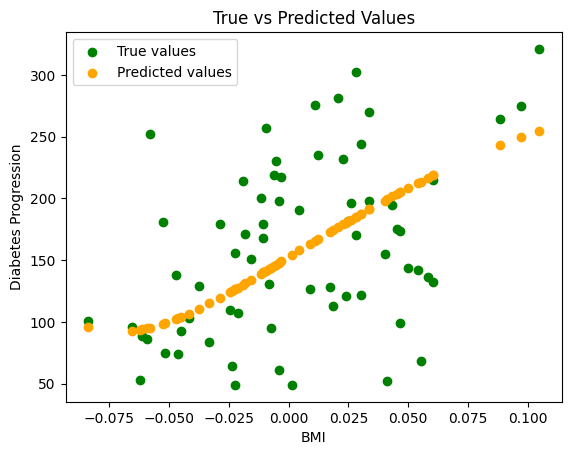

In [5]:
# Transform the test data to polynomial features
X_test_poly = poly.transform(X_test)

# Predicting the test data using the best model
y_test_pred = best_model.predict(X_test_poly)

# Created a scatter plot for the true test values
plt.scatter(X_test, y_test, color='green', label='True values')

# Added the predicted test values to the same plot
plt.scatter(X_test, y_test_pred, color='orange', label='Predicted values')

# Added labels and title
plt.xlabel('BMI')
plt.ylabel('Diabetes Progression')
plt.title('True vs Predicted Values')

# Added a legend to differentiate true and predicted values
plt.legend()

# Displaying the plot
plt.show()

## Step 6: Model Interpretation

Towards the conclusion, , we'll explain our selected model by writing down its equation, kind of like revealing a secret formula. Afterward, we'll use this formula to figure out how diabetes might progress for a specific BMI level, almost like using a secret key to make predictions about the future.

In [6]:
# Geting the coefficients and intercept from the best model
coef = best_model.coef_
intercept = best_model.intercept_

# Initialized the equation string with the intercept
equation = "y = " + str(intercept)

# Added each coefficient to the equation string
for i in range(len(coef)):
    equation += " + " + str(coef[i]) + " * x^" + str(i)

# Printing the equation of the best model
print(f'Best model equation: {equation}')

# Defined an example BMI value
bmi_value = 0.05

# Transform the BMI value to polynomial features
bmi_value_poly = poly.transform([[bmi_value]])

# Used the best model to predict the expected diabetes progression for the BMI value
expected_progression = best_model.predict(bmi_value_poly)

# Printing the expected diabetes progression for the BMI value
print(f'Expected diabetes progression for BMI={bmi_value}: {expected_progression[0]}')

Best model equation: y = 152.51594386317439 + 0.0 * x^0 + 1186.204249798065 * x^1 + -106.3327512870048 * x^2 + -38695.80605715241 * x^3 + 322126.7808612744 * x^4 + -1220677.341462946 * x^5
Expected diabetes progression for BMI=0.05: 208.35517942889186


## Step 7: Polynomial Regression: Number of Trainable Parameters

In our exploration, we will delve deeply into understanding the count of trainable parameters within polynomial regression models of varying degrees. This endeavor is analogous to embarking on a treasure hunt, where each degree of the polynomial uncovers additional insights into the intricacies of the model.

To facilitate our journey, we will leverage a valuable utility provided by sklearn's PolynomialFeatures known as get_feature_names_out(). This function will act as our guide, providing essential information as we unravel the details associated with these parameters.

In [7]:
#   Looping over degrees from 0 to 5
for degree in range(6):
    # Create a PolynomialFeatures object for transforming the input data
    poly = PolynomialFeatures(degree=degree)

    # Transform the training data
    X_train_poly = poly.fit_transform(X_train)

    # Get the feature names
    feature_names = poly.get_feature_names_out(input_features=['x'])

    # The number of trainable parameters is the number of features plus one (for the intercept)
    num_params = len(feature_names) + 1

    print(f'Degree {degree} model has {num_params} trainable parameters: {feature_names} and the intercept')

Degree 0 model has 2 trainable parameters: ['1'] and the intercept
Degree 1 model has 3 trainable parameters: ['1' 'x'] and the intercept
Degree 2 model has 4 trainable parameters: ['1' 'x' 'x^2'] and the intercept
Degree 3 model has 5 trainable parameters: ['1' 'x' 'x^2' 'x^3'] and the intercept
Degree 4 model has 6 trainable parameters: ['1' 'x' 'x^2' 'x^3' 'x^4'] and the intercept
Degree 5 model has 7 trainable parameters: ['1' 'x' 'x^2' 'x^3' 'x^4' 'x^5'] and the intercept


## Conclusion

In this notebook, a comprehensive machine learning endeavor has been initiated with the objective of predicting diabetes progression based on BMI. The journey commenced with the loading and partitioning of data, followed by the training and evaluation of polynomial regression models with varying degrees of complexity.

Subsequently, the optimal model, or the champion, was selected based on its performance on the validation set, assessed through the Mean Absolute Percentage Error (MAPE). The champion model underwent a final assessment on the test set, where its predictions were visualized.

Ultimately, the model was deciphered by articulating its equation, enabling the computation of projected diabetes progression for a given BMI value.

In [8]:
# Calculate the mean absolute error (MAE) for the test data
test_mae = mean_absolute_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)  # Add this line to define test_r2

# Calculate the mean absolute percentage error (MAPE) for the test data
test_mape = mean_absolute_percentage_error(y_test, y_test_pred)

# Print the R2 score, MAE, MAPE, and best model equation for the test data
print(f'Test R2: {test_r2}')
print(f'Test MAE: {test_mae}')
print(f'Test MAPE: {test_mape}')
print(f'Best model equation: {equation} == {expected_progression[0]}')

Test R2: 0.13367946966371658
Test MAE: 51.94644861449457
Test MAPE: 42.50644966112318
Best model equation: y = 152.51594386317439 + 0.0 * x^0 + 1186.204249798065 * x^1 + -106.3327512870048 * x^2 + -38695.80605715241 * x^3 + 322126.7808612744 * x^4 + -1220677.341462946 * x^5 == 208.35517942889186
